# [Python: Implementing a k-means algorithm with sklearn](http://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn)

## 1. Import libraries
Firstly, we import the pandas, pylab and sklearn libraries. Pandas is for the purpose of importing the dataset in csv format, pylab is the graphing library used in this example, and sklearn is used to devise the clustering algorithm.

In [10]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 2. Load sample dataset
The 'sample_stocks.csv' dataset is imported, with our Y variable defined as 'returns' and X variable defined as 'dividendyield'.


In [11]:
stocks_csv = 'data/k-means-with-sklearn-sample-stocks.csv'
variables = pandas.read_csv(stocks_csv)
Y = variables[['returns']]
X = variables[['dividendyield']]


## 3. Graph the dataset with pylab
The elbow curve is then graphed using the pylab library. Specifically, we are devising a range from 1 to 20 (which represents our number of clusters), and our score variable denotes the percentage of variance explained by the number of clusters.

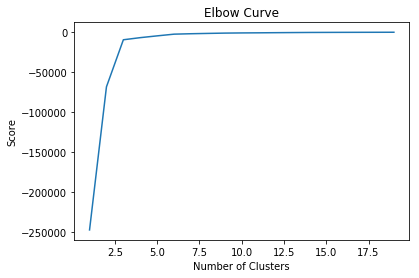

In [12]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

When we graph the plot, we see that the graph levels off rapidly after 3 clusters, implying that addition of more clusters do not explain much more of the variance in our relevant variable; in this case stock returns.

## 4. Apply pca and kmeans to the data
Once the appropriate number of clusters have been identified (k=3), then the pca (Principal Component Analysis) and kmeans algorithms can be devised.
The purpose behind these two algorithms are two-fold. Firstly, the pca algorithm is being used to convert data that might be overly dispersed into a set of linear combinations that can more easily be interpreted.

In [13]:
pca = PCA(n_components=1).fit(Y)
pca_d = pca.transform(Y)
pca_c = pca.transform(X)

From Step 3, we already know that the optimal number of clusters according to the elbow curve has been identified as 3. Therefore, we set n_clusters equal to 3, and upon generating the k-means output use the data originally transformed using pca in order to plot the clusters:

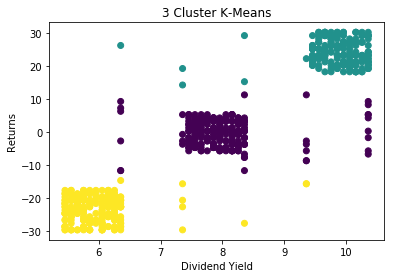

In [14]:
kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y)
pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Dividend Yield')
pl.ylabel('Returns')
pl.title('3 Cluster K-Means')
pl.show()

From the above, we see that the clustering algorithm demonstrates an overall positive correlation between stock returns and dividend yields, implying that stocks paying higher dividend yields can be expected to have higher overall returns. While this is a more simplistic example and could be modelled through linear regression analysis, there are many instances where relationships between data will not be linear and k-means can serve as a valuable tool in understanding the data through clustering methods.